# Najbogatejši zemljani

### Projektna naloga iz analize podatkov pri predmetu Programiranje 1

Analiziral bom 500 najbogatejših zemljanov. Podatke sem pridobil s strani
[Bloomberg](https://www.bloomberg.com//billionaires/) (datum dostopa 5. november 2019). Podatki so se do začetka analize nekoliko spremenili, zato bo prišlo do odstopanj razultatov v primerjavi z  najnovejšimi podatki.

Pred začetkom analize sem si postavil nekaj delovnih hipotez:
* Miljarderji z  največjim prirastom primoženja prihajajo iz hitro razvijajočih se držav (predvsem Azijske države). 
* Bogastvo je neenakomerno razporejeno po svetu.
* NEKAJ DOPOLNI!!!
* Najbolj dobičkonosno področje je tehnologija.
* ...

Opravil bom še druge analize in od tod sklepal o pomembnih ugotovitvah.

Za podatke sem zajel naslednje podatke:
* ime in priimek,
* premoženje v $,
* zadnja sprememba premoženja v $,
* letna sprememba premoženja v $,
* država bivanja,
* področje delovanja 

Zajete so še tudi relativne spremembe premoženj.

Najprej si pripravimo delovno okolje:

In [128]:
import pandas as pd
import geopandas 
import matplotlib.pyplot as plt
import descartes

plt.rcParams['figure.figsize'] = [15, 10]

miljarderji = pd.read_csv('obdelani_podatki/podatki.csv',index_col='mesto')
pd.options.display.max_rows = 15

## 1. Analiza premoženja glede na državo porekla



In [129]:
miljarderji.groupby('drzava')['drzava'].count().sort_values(ascending=False)

drzava
United States         178
China                  44
Germany                32
Russian Federation     23
Hong Kong              20
                     ... 
Czech Republic          1
New Zealand             1
Finland                 1
Georgia                 1
Viet Nam                1
Name: drzava, Length: 47, dtype: int64

Vidimo, da največ miljarderjev prihaja iz Združenih držav Amerike.  Poglejmo si še sedaj, iz kod prihajajo miljarderji, ki so v prejšnjem letu (relativno) pridobili največ premoženja. Natančneje si bomo ogledali miljarderje, ki so v 2019 pridobili za več kot 60 \% novega premoženja.

In [130]:
najvecje_spremembe = miljarderji[miljarderji.letna_sprememba_procenti >= 60]
najvecje_spremembe

,ime,premozenje,zadnja_sprememba,zadnja_sprememba_procenti,letna_sprememba,letna_sprememba_procenti,drzava,podrocje
mesto,,,,,,,,
45,Colin Huang,21500000000,316000000,1.5,9880000000,84.9,China,Technology
51,Charoen Sirivadhanabhakdi,20500000000,-6550000,-0.0,7970000000,63.6,Thailand,Food & Beverage
98,Sun Piaoyang,13900000000,247000000,1.8,7860000000,129.2,China,Health Care
104,Pang Kang,13100000000,76300000,0.6,5040000000,62.5,China,Food & Beverage
111,Zhong Huijuan,12500000000,-148000000,-1.2,6230000000,99.3,China,Health Care
...,...,...,...,...,...,...,...,...
489,David Bonderman,4230000000,46400000,1.1,1860000000,78.8,United States,Finance
494,Patrick Collison,4200000000,0,0.0,1770000000,72.5,Ireland,Technology
495,John Collison,4200000000,0,0.0,1770000000,72.5,Ireland,Technology


In [131]:
max_spremembe_grupirano = najvecje_spremembe.groupby('drzava')['drzava'].count().sort_values(ascending=False)

In [132]:
max_spremembe_grupirano

drzava
China            11
United States     5
Singapore         3
Thailand          2
Ireland           2
Hong Kong         1
Germany           1
France            1
Australia         1
Name: drzava, dtype: int64

Opazimo, da največ takih miljarderjev prihaja iz Kitajske. Na seznamu pa najdemo tudi države kot so Singapur, Tajska ter Hong Kong. Pogledamo si lahko še v kateri panogi delujejo.

In [133]:
panoga_max_sprememba = najvecje_spremembe.groupby('podrocje')['podrocje'].count().sort_values(ascending=False)

In [134]:
panoga_max_sprememba

podrocje
Technology         5
Health Care        5
Food & Beverage    5
Media & Telecom    2
Industrial         2
Services           1
Retail             1
Real Estate        1
Finance            1
Energy             1
Diversified        1
Consumer           1
Commodities        1
Name: podrocje, dtype: int64

## 2. Porazdelitev premoženja po svetu

text

Pripravimo si seznam držav z njihovimi zemljepisnimi širinami in dolžinami ([vir](https://developers.google.com/public-data/docs/canonical/countries_csv)).

In [135]:
drzave = pd.read_csv('drzave.csv', index_col='drzava')

In [136]:
drzave

,id,latitude,longitude
drzava,,,
Andorra,AD,42.546245,1.601554
United Arab Emirates,AE,23.424076,53.847818
Afghanistan,AF,33.939110,67.709953
Antigua and Barbuda,AG,17.060816,-61.796428
Anguilla,AI,18.220554,-63.068615
...,...,...,...
Yemen,YE,15.552727,48.516388
Mayotte,YT,-12.827500,45.166244
South Africa,ZA,-30.559482,22.937506


In [137]:
miljarderji_z_lokacijo=pd.merge(miljarderji, drzave, on='drzava')

In [138]:
gdf = geopandas.GeoDataFrame(miljarderji_z_lokacijo,
      geometry=geopandas.points_from_xy(miljarderji_z_lokacijo.longitude,miljarderji_z_lokacijo.latitude))

In [139]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

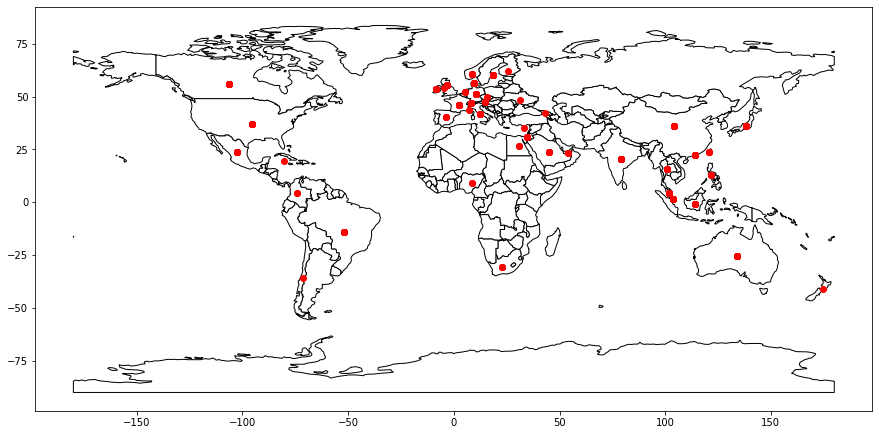

In [140]:
ax = world.plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')

Na zgornjem zemljevidu so označene samo države  iz katerih prihajajo miljarderji. Spodaj pa je upoštevano še število posameznih miljarderjev. Tako so države z večjim številom miljarderjev označene z največjim krogcem.

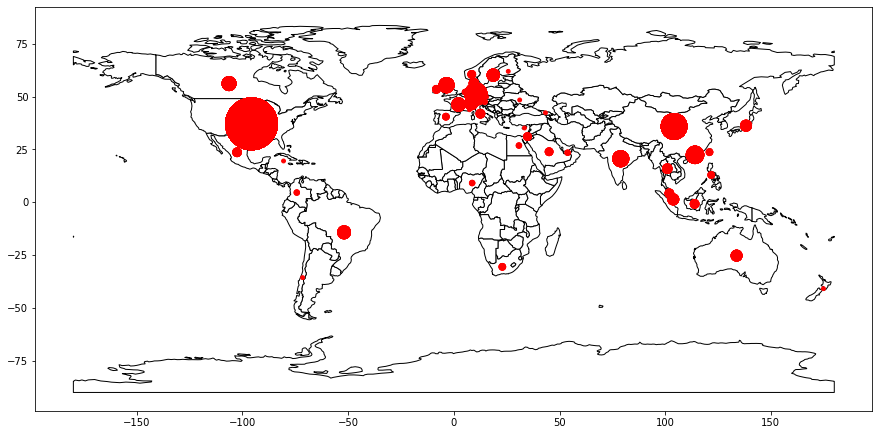

In [141]:
ax = world.plot(color='white', edgecolor='black')
grupirane_drzave = miljarderji.groupby('drzava')['drzava'].count().sort_values(ascending=False)
gdf.plot(markersize = grupirane_drzave.get(miljarderji_z_lokacijo.drzava)*15 ,ax=ax, color='red')

Poglejmo si sedaj še razporeditev denarja miljarderjev po svetu.

In [142]:
vso_premozenje = miljarderji_z_lokacijo['premozenje'].sum()
vso_premozenje_po_drzavah = miljarderji_z_lokacijo.groupby('drzava')['premozenje'].sum()

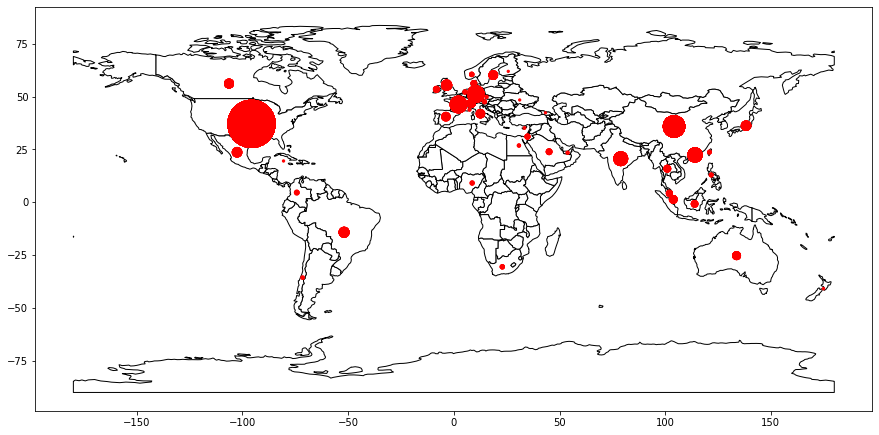

In [143]:
ax = world.plot(color='white', edgecolor='black')
gdf.plot(markersize = vso_premozenje_po_drzavah.get(miljarderji_z_lokacijo.drzava)*5000/vso_premozenje ,ax=ax, color='red')

## 3. NEKAJ DOPOLNI !!!

## 4.  Dobičkonosnosti področij

Menim, da je 